In [17]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from collections import Counter
from matplotlib.ticker import AutoMinorLocator

In [18]:
wave_emit = 1215.67 # Angstroms

In [19]:
#load the file from MIDAS here
#wavelength in angstroms
#doppler param in km/s
#column density is in log - change it to lineat using 10**log
#calculate the redshifts corresponding to wavelengths
#arr = [1, 2, 2, 3, 3, 3, 4]
#counts = Counter(arr)
#counts
#counts, bins,_ = plt.hist(gauss2,bins = 30, density=True, label='')


In [20]:
# Generate random data for the histogram
#data = np.random.randn(1000)

# Plotting a basic histogram
#binwidth1 = 0.5
#bins1 = np.arange(min(data) , max(data) + binwidth1 , binwidth1)
#plt.hist(data, bins1, color='skyblue', edgecolor='black')

In [21]:
#np.quantile
#Given a sample a from an underlying distribution, 
#quantile provides a nonparametric estimate of the inverse cumulative distribution function.

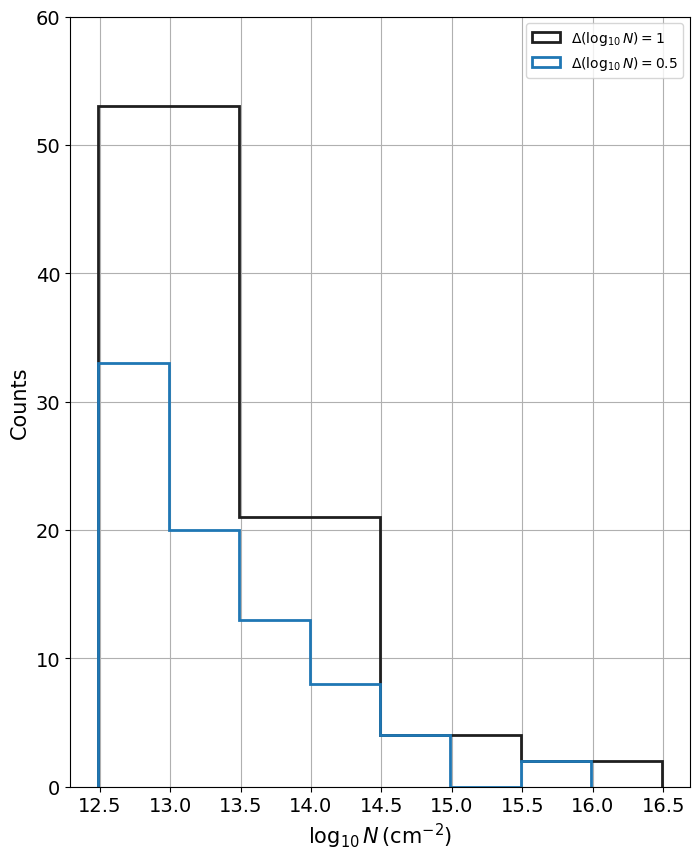

In [22]:
file = np.loadtxt("fit_usmspecn_all.txt",usecols=(0,2) ,unpack=True)
log_N = file[1]
wave_obs = file[0]
red = wave_obs/1215.67 - 1
del_z = round(max(red) - min(red), 3)
binw1 = 1.0
binw2 = 0.5
bins1 = np.arange( min(log_N) , max(log_N) + binw1, binw1)
bins2 = np.arange( min(log_N) , max(log_N) + binw2, binw2)
# Plot
raw_color = '#1f1f1f'
norm_color = '#1f77b4'
plt.figure(figsize=(8, 10))
plt.hist(log_N, bins=bins1, histtype= 'step', color=raw_color, linewidth=2, label=r'$\Delta(\log_{10} N) = 1$')
plt.hist(log_N, bins=bins2,histtype='step' , color=norm_color, linewidth=2, label=r'$\Delta(\log_{10} N) = 0.5$')
plt.xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=14)
plt.ylim(0,60)
plt.legend()
plt.grid(True)
plt.savefig('HD-as-it-is.png')
plt.show()

In [23]:
print(binw1)
print(bins1)

1.0
[12.49 13.49 14.49 15.49 16.49]


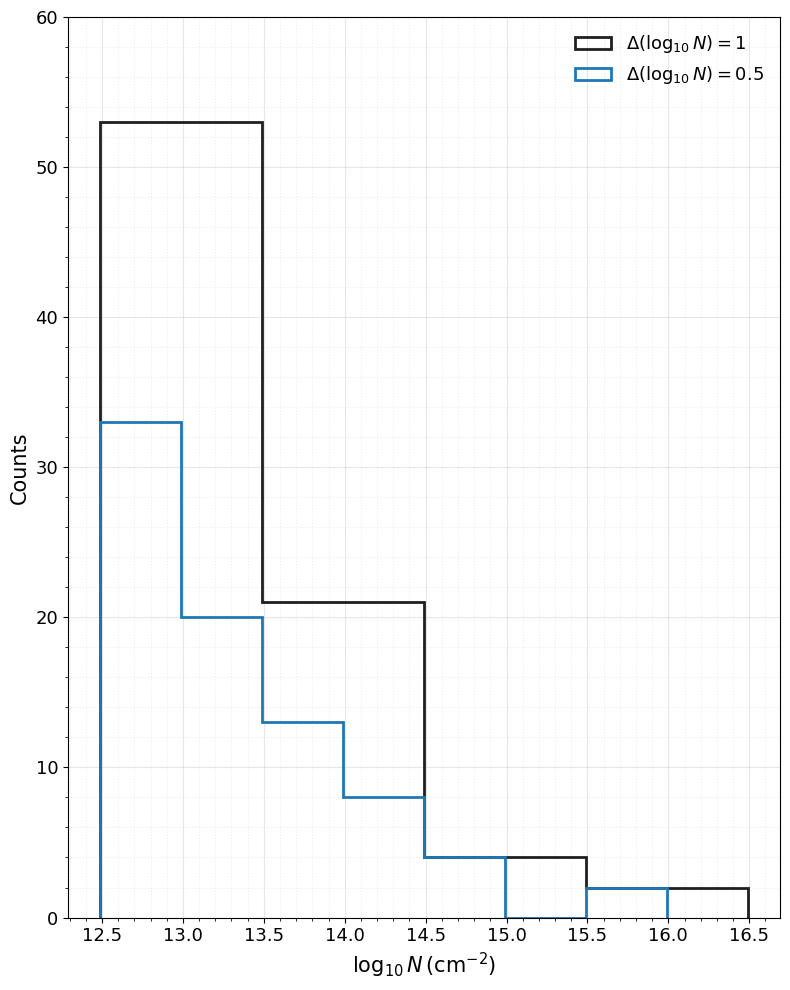

In [24]:
# Define colors
raw_color = '#1f1f1f'          # dark gray/black for raw
norm_color = '#1f77b4'         # blue for refined bin

# Create figure
fig, ax = plt.subplots(figsize=(8, 10))

# Histograms
ax.hist(log_N, bins=bins1, histtype='step', color=raw_color, linewidth=2,
        label=r'$\Delta(\log_{10} N) = 1$')
ax.hist(log_N, bins=bins2, histtype='step', color=norm_color, linewidth=2,
        label=r'$\Delta(\log_{10} N) = 0.5$')

# Labels and limits
ax.set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_ylim(0, 60)

# Ticks
ax.tick_params(axis='both', which='major', labelsize=13)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Grid
ax.grid(True, which='major', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)

# Legend
ax.legend(fontsize=13, frameon=False)

# Final layout
plt.tight_layout()
plt.savefig('HD_Beautified_with_Microticks.png', dpi=300)
plt.show()

In [33]:
# Bin widths
binw1_11 = 1.0
binw2_11 = 0.5
binw1_12 = 2
binw2_12 = 1
binw1_21 = 0.5
binw2_21 = 0.25
binw1_22 = 2
binw2_22 = 0.5

#Bins
bins1_11 = np.arange( min(log_N) , max(log_N) + binw1_11, binw1_11)
bins2_11 = np.arange( min(log_N) , max(log_N) + binw2_11, binw2_11)
bins1_12 = np.arange( min(log_N) , max(log_N) + binw1_12, binw1_12)
bins2_12 = np.arange( min(log_N) , max(log_N) + binw2_12, binw2_12)
bins1_21 = np.arange( min(log_N) , max(log_N) + binw1_21, binw1_21)
bins2_21 = np.arange( min(log_N) , max(log_N) + binw2_21, binw2_21)
bins1_22 = np.arange( min(log_N) , max(log_N) + binw1_22, binw1_22)
bins2_22 = np.arange( min(log_N) , max(log_N) + binw2_22, binw2_22)

bins1_11 = np.insert(bins1_11, 0, bins1_11[0] - 0.01)
bins2_11 = np.insert(bins2_11, 0, bins2_11[0] - 0.01)
bins1_12 = np.insert(bins1_12, 0, bins1_12[0] - 0.01)
bins2_12 = np.insert(bins2_12, 0, bins2_12[0] - 0.01)
bins1_21 = np.insert(bins1_21, 0, bins1_21[0] - 0.01)
bins2_21 = np.insert(bins2_21, 0, bins2_21[0] - 0.01)
bins1_22 = np.insert(bins1_22, 0, bins1_22[0] - 0.01)
bins2_22 = np.insert(bins2_22, 0, bins2_22[0] - 0.01)

count1_11, _ = np.histogram(log_N, bins1_11)
count2_11, _ = np.histogram(log_N, bins2_11)
count1_12, _ = np.histogram(log_N, bins1_12)
count2_12, _ = np.histogram(log_N, bins2_12)
count1_21, _ = np.histogram(log_N, bins1_21)
count2_21, _ = np.histogram(log_N, bins2_21)
count1_22, _ = np.histogram(log_N, bins1_22)
count2_22, _ = np.histogram(log_N, bins2_22)

def normalize_counts(counts, bin_width, del_z):
    return np.append(counts / (bin_width * np.log(10) * del_z), 0)

norm_count1_11 = normalize_counts(counts1_11, binw1_11, del_z)
norm_count2_11 = normalize_counts(counts2_11, binw2_11, del_z)

norm_count1_12 = normalize_counts(counts1_12, binw1_12, del_z)
norm_count2_12 = normalize_counts(counts2_12, binw2_12, del_z)

norm_count1_21 = normalize_counts(counts1_21, binw1_21, del_z)
norm_count2_21 = normalize_counts(counts2_21, binw2_21, del_z)

norm_count1_22 = normalize_counts(counts1_22, binw1_22, del_z)
norm_count2_22 = normalize_counts(counts2_22, binw2_22, del_z)

In [34]:
print(bins1_11)
print(count1_11)

[12.48 12.49 13.49 14.49 15.49 16.49]
[ 0 53 21  4  2]


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

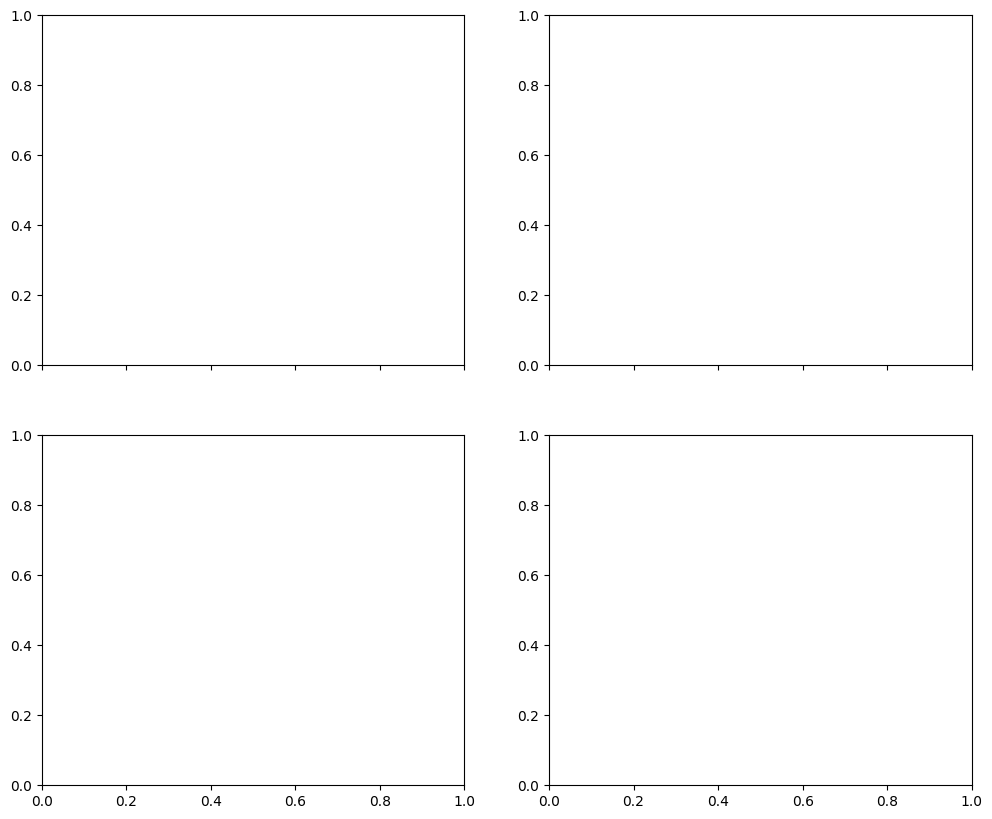

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Subplot 1 (Top-left)
axes[0, 0].step(bins1_11, count1_11, where='post', color = 'black', label=r'$\Delta(\log_{10} N) = 1$')
axes[0, 0].step(bins2_11, count2_11, where='post', color = 'blue', label=r'$\Delta(\log_{10} N) = 0.5$')
axes[0, 0].set_ylim(0, 80)
axes[0, 0].set_ylabel('Counts', fontsize=13)
axes[0, 0].tick_params(labelsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Subplot 2 (Top-right)
axes[0, 1].step(bins1_12, count1_12, where='post', color = 'black', label=r'$\Delta(\log_{10} N) = 2$')
axes[0, 1].step(bins2_12, count2_12, where='post', color = 'blue', label=r'$\Delta(\log_{10} N) = 1$')
axes[0, 1].set_ylim(0, 80)
axes[0, 1].tick_params(labelsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True)

# Subplot 3 (Bottom-left)
axes[1, 0].step(bins1_21, count1_21, where='post', color = 'black', label=r'$\Delta(\log_{10} N) = 0.5$')
axes[1, 0].step(bins2_21, count2_21, where='post', color = 'blue', label=r'$\Delta(\log_{10} N) = 0.25$')
axes[1, 0].set_ylim(0, 80)
axes[1, 0].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 0].set_ylabel('Counts', fontsize=13)
axes[1, 0].tick_params(labelsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True)

# Subplot 4 (Bottom-right)
axes[1, 1].step(bins1_22, count1_22, where='post', color = 'black', label=r'$\Delta(\log_{10} N) = 2$')
axes[1, 1].step(bins2_22, count2_22, where='post', color = 'blue', label=r'$\Delta(\log_{10} N) = 0.25$')
axes[1, 1].set_ylim(0, 80)
axes[1, 1].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 1].tick_params(labelsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('Un_norm_hist_2x2.png')
plt.show()


NameError: name 'count1_11' is not defined

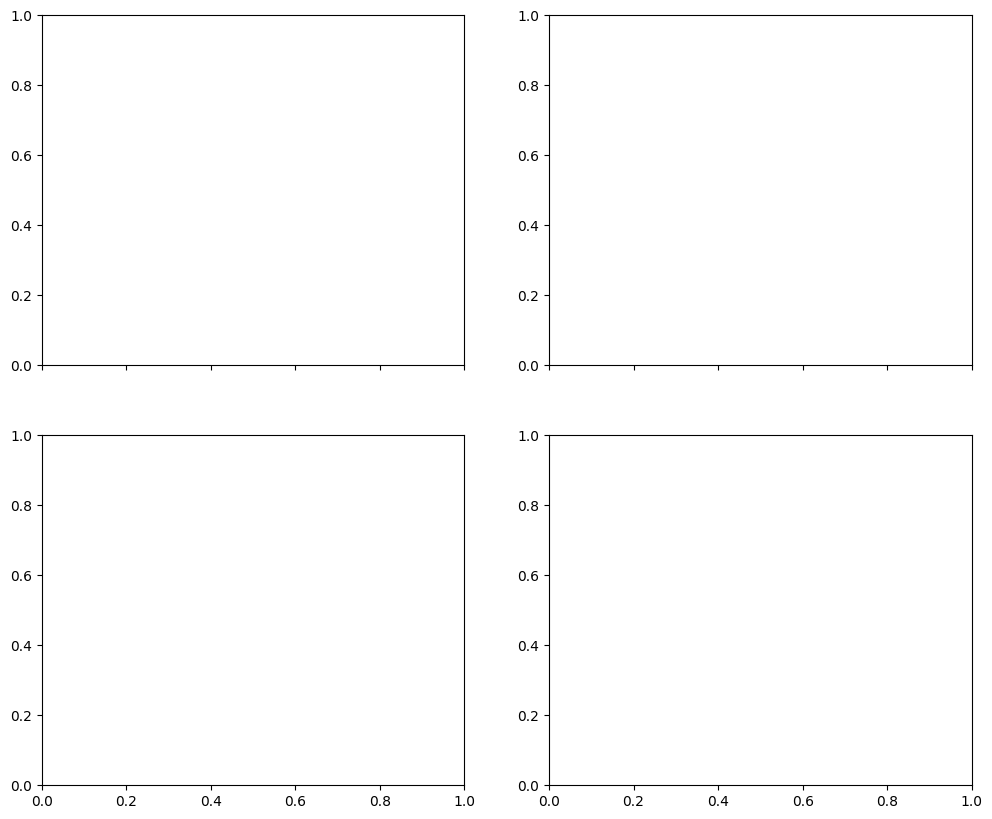

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Subplot 1 (Top-left)
axes[0, 0].step(bins1_11, count1_11, where='post', color='black', label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 0].step(bins2_11, count2_11, where='post', color='blue', label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[0, 0].step(bins2_11, norm_count2_11, where='post', color='blue', linestyle='--', label='Norm')
axes[0, 0].set_ylim(0,250)
axes[0, 0].set_ylabel('Counts', fontsize=13)
axes[0, 0].tick_params(labelsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Subplot 2 (Top-right)
axes[0, 1].step(bins1_12, count1_12, where='post', color='black', label=r'Raw $\Delta(\log_{10} N) = 2$')
axes[0, 1].step(bins2_12, count2_12, where='post', color='blue', label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 1].step(bins2_12, norm_count2_12, where='post', color='blue', linestyle='--', label='Norm')
axes[0, 1].set_ylim(0,200)
axes[0, 1].tick_params(labelsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True)

# Subplot 3 (Bottom-left)
axes[1, 0].step(bins1_21, count1_21, where='post', color='black', label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[1, 0].step(bins2_21, count2_21, where='post', color='blue', label=r'Raw $\Delta(\log_{10} N) = 0.25$')
axes[1, 0].step(bins2_21, norm_count2_21, where='post', color='blue', linestyle='--', label='Norm')
axes[1, 0].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 0].set_ylim(0,350)
axes[1, 0].set_ylabel('Counts', fontsize=13)
axes[1, 0].tick_params(labelsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True)

# Subplot 4 (Bottom-right)
axes[1, 1].step(bins1_22, count1_22, where='post', color='black', label=r'Raw $\Delta(\log_{10} N) = 2$')
axes[1, 1].step(bins2_22, count2_22, where='post', color='blue', label=r'Raw $\Delta(\log_{10} N) = 0.25$')
axes[1, 1].step(bins2_22, norm_count2_22, where='post', color='blue', linestyle='--', label='Norm')
axes[1, 1].set_ylim(0,250)
axes[1, 1].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 1].tick_params(labelsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('Norm_and_Unnorm_hist_2x2.png')
plt.show()

NameError: name 'count1_11' is not defined

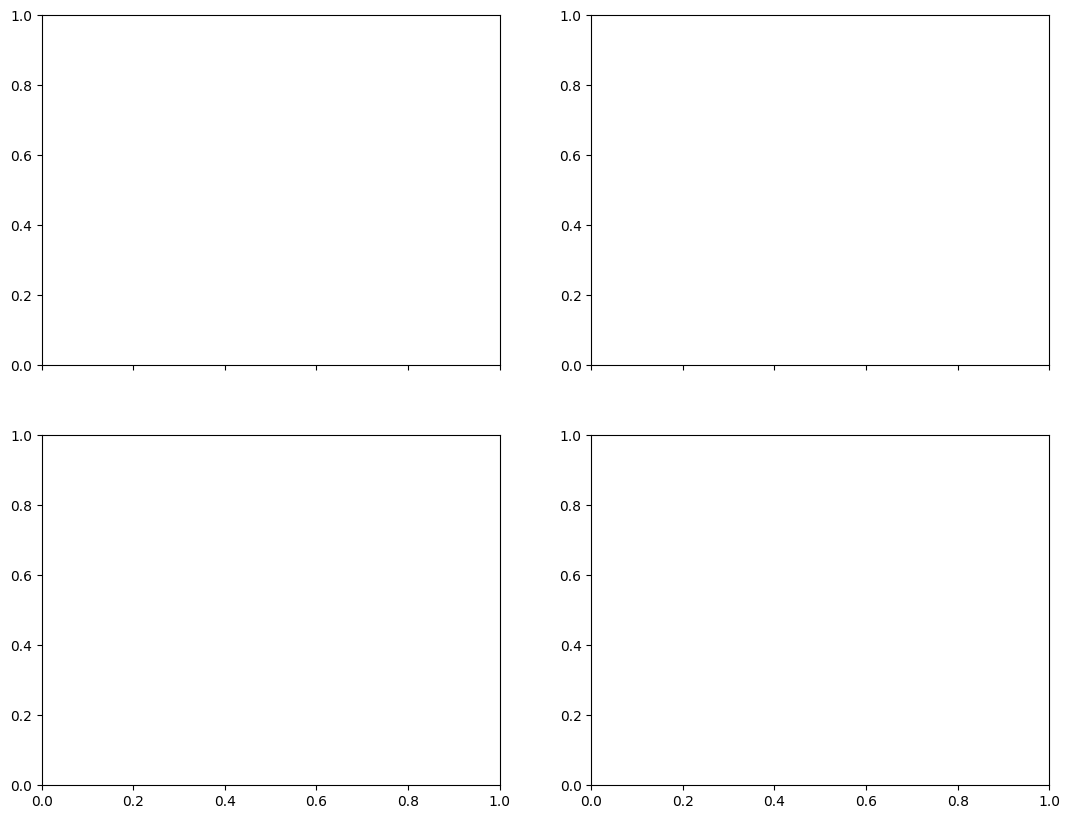

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10), sharex=True)

# Define colors
raw_color = '#1f1f1f'
norm_color = '#1f77b4'
norm_color_light = '#6baed6'

# Function to apply consistent formatting with minor ticks
def format_axis(ax, title=None, xlabel=None, ylabel=None, ylim=None):
    if title:
        ax.set_title(title, fontsize=14)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=14)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=14)
    if ylim:
        ax.set_ylim(*ylim)
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which='major', alpha=0.3)
    ax.grid(True, which='minor', linestyle=':', alpha=0.2)

# Subplot 1
axes[0, 0].step(bins1_11, count1_11, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 0].step(bins2_11, count2_11, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[0, 0].step(bins2_11, norm_count2_11, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[0, 0], title='Bin widths: 1 vs 0.5', ylabel='Counts', ylim=(0, 250))
axes[0, 0].legend(fontsize=11)

# Subplot 2
axes[0, 1].step(bins1_12, count1_12, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 2$')
axes[0, 1].step(bins2_12, count2_12, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 1].step(bins2_12, norm_count2_12, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[0, 1], title='Bin widths: 2 vs 1', ylim=(0, 200))
axes[0, 1].legend(fontsize=11)

# Subplot 3
axes[1, 0].step(bins1_21, count1_21, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[1, 0].step(bins2_21, count2_21, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.25$')
axes[1, 0].step(bins2_21, norm_count2_21, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[1, 0], title='Bin widths: 0.5 vs 0.25', xlabel=r"$\log_{10}N\,(\mathrm{cm}^{-2})$", ylabel='Counts', ylim=(0, 350))
axes[1, 0].legend(fontsize=11)

# Subplot 4
axes[1, 1].step(bins1_22, count1_22, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 2$')
axes[1, 1].step(bins2_22, count2_22, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.25$')
axes[1, 1].step(bins2_22, norm_count2_22, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[1, 1], title='Bin widths: 2 vs 0.25', xlabel=r"$\log_{10}N\,(\mathrm{cm}^{-2})$", ylim=(0, 250))
axes[1, 1].legend(fontsize=11)

plt.tight_layout()
plt.savefig('Norm_Histogram_with_Microticks.png', dpi=300)
plt.show()


In [ ]:
def get_bin_centers(bins):
    return 0.5 * (bins[:-1] + bins[1:])

centers1_11 = get_bin_centers(bins1_11)
centers2_11 = get_bin_centers(bins2_11)

centers1_12 = get_bin_centers(bins1_12)
centers2_12 = get_bin_centers(bins2_12)

centers1_21 = get_bin_centers(bins1_21)
centers2_21 = get_bin_centers(bins2_21)

centers1_22 = get_bin_centers(bins1_22)
centers2_22 = get_bin_centers(bins2_22)

print(centers1_11)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10), sharex=True)

# Define colors
raw_color = '#1f1f1f'
norm_color = '#1f77b4'
norm_color_light = '#6baed6'

# Function to apply consistent formatting with minor ticks
def format_axis(ax, title=None, xlabel=None, ylabel=None, ylim=None):
    if title:
        ax.set_title(title, fontsize=14)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=14)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=14)
    if ylim:
        ax.set_ylim(*ylim)
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which='major', alpha=0.3)
    ax.grid(True, which='minor', linestyle=':', alpha=0.2)


bin_centers1_11_1 = [12.485, 12.99, 13.99, 14.99, 15.99]
bin_centers1_11_2 = [12.99, 13.99, 14.99, 15.99, 16.99]
bin_centers1_11_3 = [13.99, 14.99, 15.99, 16.99, 17.99]
bin_centers1_11_4 = [12.485, 12.99, 13.99, 14.99, 15.99]

# Subplot 1
axes[0, 0].step(bins1_11, count1_11, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 0].step(bins2_11, count2_11, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[0, 0].step(bins2_11, norm_count2_11, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[0, 0], title='Bin widths: 1 vs 0.5', ylabel='Counts', ylim=(0, 250))
axes[0, 0].legend(fontsize=11)

# Subplot 2
axes[0, 1].step(bins1_11, count1_11, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[0, 1].step(bins2_11, count2_11, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[0, 1].step(bins2_11, norm_count2_11, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[0, 1], title='Bin widths: 2 vs 1', ylim=(0, 200))
axes[0, 1].legend(fontsize=11)

# Subplot 3
axes[1, 0].step(bins1_11, count1_11, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[1, 0].step(bins2_11, count2_11, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[1, 0].step(bins2_11, norm_count2_11, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[1, 0], title='Bin widths: 0.5 vs 0.25', xlabel=r"$\log_{10}N\,(\mathrm{cm}^{-2})$", ylabel='Counts', ylim=(0, 350))
axes[1, 0].legend(fontsize=11)

# Subplot 4
axes[1, 1].step(bins1_11, count1_11, where='post', color=raw_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 1$')
axes[1, 1].step(bins2_11, count2_11, where='post', color=norm_color, linewidth=2, label=r'Raw $\Delta(\log_{10} N) = 0.5$')
axes[1, 1].step(bins2_11, norm_count2_11, where='post', color=norm_color_light, linestyle='--', linewidth=2, label='Normalized')
format_axis(axes[1, 1], title='Bin widths: 2 vs 0.25', xlabel=r"$\log_{10}N\,(\mathrm{cm}^{-2})$", ylim=(0, 250))
axes[1, 1].legend(fontsize=11)

plt.tight_layout()
plt.savefig('Norm_Histogram_with_Microticks.png', dpi=300)
plt.show()


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Subplot 1 (Top-left)
axes[0, 0].step(bins1_11, norm_count1_11, where='post', color='black', linestyle='--', label='Norm')
axes[0, 0].step(bins2_11, norm_count2_11, where='post', color='blue', linestyle='--')
axes[0, 0].set_ylabel('Counts', fontsize=13)
axes[0, 0].tick_params(labelsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Subplot 2 (Top-right)
axes[0, 1].step(bins1_12, norm_count1_12, where='post', color='black', linestyle='--', label='Norm')
axes[0, 1].step(bins2_12, norm_count2_12, where='post', color='blue', linestyle='--')
axes[0, 1].tick_params(labelsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True)

# Subplot 3 (Bottom-left)
axes[1, 0].step(bins1_21, norm_count1_21, where='post', color='black', linestyle='--', label='Norm')
axes[1, 0].step(bins2_21, norm_count2_21, where='post', color='blue', linestyle='--')
axes[1, 0].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 0].set_ylabel('Counts', fontsize=13)
axes[1, 0].tick_params(labelsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True)

# Subplot 4 (Bottom-right)
axes[1, 1].step(bins1_22, norm_count1_22, where='post', color='black', linestyle='--', label='Norm')
axes[1, 1].step(bins2_22, norm_count2_22, where='post', color='blue', linestyle='--')
axes[1, 1].set_xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=13)
axes[1, 1].tick_params(labelsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('Norm_hist_2x2.png')
plt.show()

In [ ]:
counts1, bin_edges1 = np.histogram(log_N, bins=bins1)
counts2, bin_edges2 = np.histogram(log_N, bins=bins2)

print(f"For bin width 1.0, {bins2}, the counts are {counts2}")

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(red , log_N)
plt.xlabel("$z$", fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=15)
plt.yticks(fontsize=14)
plt.savefig("z_log_N_dist.png")

In [ ]:
col_dense = 10**log_N
col_dense
plt_ln_col_dense = np.log(col_dense)
plt_ln_col_dense

binw1 = 1.0
binw2 = 0.5
bins1 = np.arange( min(log_N) , max(log_N) + binw1, binw1)
bins2 = np.arange( min(log_N) , max(log_N) + binw2, binw2) 

In [ ]:
norm_count1 = counts1 / (binw1 * np.log(10)* del_z)
norm_count1 = np.append(norm_count1, 0)
norm_count2 = counts2 / (binw2 * np.log(10)* del_z)
norm_count2 = np.append(norm_count2, 0)

print(norm_count1)
print(norm_count2)

In [ ]:
#bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
#plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='green', label='Normalized by binw1 and Δz')
plt.step(bins1 , norm_count1, where='post')
plt.step(bins2 , norm_count2, where='post')
plt.xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$")
plt.ylabel('Normalized Count')
plt.title('Normalized Histogram: log N vs Count / (Δz × binw1)')
plt.show()

In [ ]:
#convert log to ln so thar bin edges on lower side are defined ,#to ensure that the limits is between 0-250, we divide by ln 10, (equTION12)
# for equal count binning, if two values are blended or have same exact column densities
#how will you separate them?
#we do so by CHANGING THE COLUMN DENSITIES
#we do that by adding a small offset or random gaussian noise
#to ensure that the limits is between 0-250, we divide by ln 10

In [ ]:
# Add a dummy bin at the beginning
bins1 = np.insert(bins1, 0, bins1[0] - 0.01)
norm_count1 = np.insert(norm_count1, 0, 0)

bins2 = np.insert(bins2, 0, bins2[0] - 0.01)
norm_count2 = np.insert(norm_count2, 0, 0)

In [ ]:
print(bins1)
print(len(bins2))
print(norm_count1)
print(len(norm_count2))

In [ ]:
#bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
#plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='green', label='Normalized by binw1 and Δz')
plt.figure(figsize=(8,10))
plt.step(bins1 , norm_count1, where='post', label = r'$\Delta(\log_{10} N) = 1$')
plt.step(bins2 , norm_count2, where='post', label = r'$\Delta(\log_{10} N) = 0.5$')
plt.ylim(0,250)
plt.xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Normalized Counts', fontsize=15)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('Code_gen_hist.png')
plt.show()

============================================================================================================================================

In [ ]:
binw1 = 2
binw2 = 0.2
bins1 = np.arange( min(log_N) , max(log_N) + binw1, binw1)
bins2 = np.arange( min(log_N) , max(log_N) + binw2, binw2)
bins1 = np.insert(bins1, 0, bins1[0] - 0.01)
bins2 = np.insert(bins2, 0, bins2[0] - 0.01)
print(bins1)
print(bins2)
counts1, _ = np.histogram(log_N, bins1)
counts2, _ = np.histogram(log_N, bins2)
print(counts1)
print(counts2)

In [ ]:
# Add a dummy bin at the beginning
#count1 = np.insert(counts1, 0, 0)
count1 = np.append(counts1, 0)
#count2 = np.insert(counts2, 0, 0)
count2 = np.append(counts2, 0)

In [ ]:
print(count1)
print(count2)
print(bins1)
print(bins2)

In [ ]:
#bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
#plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='green', label='Normalized by binw1 and Δz')
plt.step(bins1 , count1, where='post')
plt.step(bins2 , count2, where='post')
plt.ylim(0,80)
plt.xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$")
plt.ylabel('Normalized Count')
plt.grid(True)
plt.title('Normalized Histogram: log N vs Count / (Δz × binw1)')
plt.show()

In [ ]:
plt.figure(figsize=(8,10))
plt.step(bins1 , count1, where='post', label = r'$\Delta(\log_{10} N) = 2$')
plt.step(bins2 , count2, where='post', label = r'$\Delta(\log_{10} N) = 0.2$')
plt.ylim(0,80)
plt.xlabel(r"$\log_{10}N\,(\mathrm{cm}^{-2})$", fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('Un_norm_hist.png')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
jittered_log_N = log_N + np.random.normal(loc=0.0, scale=1e-4, size=log_N.shape)
jittered_log_N = np.sort(jittered_log_N)
num_bins = 20
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(jittered_log_N, quantiles)

# Now these bins will split the data more evenly
plt.hist(jittered_log_N, bin_edges, edgecolor='black', alpha=0.7)

plt.xlabel('log N (with jitter)')
plt.ylabel('Counts')
plt.title('Equal-Count Binning Histogram with Jitter')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
sorted_log_N

In [ ]:
jittered_log_N = log_N + np.random.normal(loc=0.0, scale=1e-4, size=log_N.shape)
jittered_log_N = np.sort(jittered_log_N)
num_bins = 10
quantiles = np.linspace(0, 1, num_bins + 1)
bin_edges = np.quantile(jittered_log_N, quantiles)

# Now these bins will split the data more evenly
plt.hist(jittered_log_N, bin_edges, edgecolor='black', alpha=0.7)

plt.xlabel('log N (with jitter)')
plt.ylabel('Counts')
plt.title('Equal-Count Binning Histogram with Jitter')
plt.grid(True)
plt.tight_layout()
plt.show()
print(bin_edges)

In [ ]:
lval@usm.lmu.de